In [1]:
import squidpy as sq
import scanpy as sc
import pandas as pd 
import os 

In [2]:
import numpy as np 

In [3]:
import CellNeighborEX
print('Version:', CellNeighborEX.__version__)

Version: 0.0.5


In [6]:
spdatapath='./inputQuery/'
adata=sc.read_h5ad('inputQuery/spatial_intestine.h5ad')

'''
coordinate = pd.read_csv(spdatapath+'tissue_positions_list.csv')
coordinate=coordinate.to_numpy()

print(coordinate.shape,ad_spatial_ori)

df=pd.read_csv(spdatapath+'MNN_based_annotations/3_nico_annotation_ct_name.csv')
sc_ctype_name=df.to_numpy()

df=pd.read_csv(spdatapath+'MNN_based_annotations/3_nico_annotation_cluster.csv')
nico_cluster=df.to_numpy()
cellname=nico_cluster[:,0]

print("equal",np.array_equal(cellname,ad_spatial_ori.obs_names))


d={}
for i in range(len(sc_ctype_name)):
    d[i]=sc_ctype_name[i][1]

ctname=[]
for i in range(len(cellname)):
        ctname.append( d[ nico_cluster[i,1]])

ad_spatial_ori.obs['nico_ct']=ctname

sc_ctype_name=coordinate[:,0]
d={}
for i in range(len(sc_ctype_name)):
    d[sc_ctype_name[i]]=i

index=[]
for i in range(len(cellname)):
    index.append( d[ cellname[i]])

coordinate1=coordinate[index]
print("equal",np.array_equal(cellname,coordinate1[:,0]),coordinate1.shape)

#because it is 2d tissue slide so only upload the X and Y coordiante
ad_spatial_ori.obsm['spatial']=coordinate1[:,[1,2]].astype(float)
adata=ad_spatial_ori
sample=[]
for i in range(len(ad_spatial_ori.obs_names)):
    sample.append('batch0')


adata.obs['sample']=np.array(sample)
adata.obs['sample']=pd.Categorical(adata.obs['sample'])
'''
print('1',adata)

index=[]
for i in range(len(adata.obs_names)):
    flag=1
    if adata.obs['nico_ct'][i]=='NM':
        flag=0
    if adata.obs['nico_ct'][i]=='HsPCs':
        flag=0
    if adata.obs['nico_ct'][i]=='Basophils':
        flag=0
    if adata.obs['nico_ct'][i]=='NK cells':
        flag=0
    if flag==1:
        index.append(i)


adata=adata[index]
print('2',adata)

1 AnnData object with n_obs × n_vars = 7416 × 241
    obs: 'x', 'y', 'cluster_id', 'nico_ct'
    obsm: 'spatial'
2 View of AnnData object with n_obs × n_vars = 7393 × 241
    obs: 'x', 'y', 'cluster_id', 'nico_ct'
    obsm: 'spatial'


In [7]:
# Create a dataframe from the provided AnnData object.
# coord_key (str): Key to access the spatial coordinates in `adata.obsm`.
# celltype_key (str): Key to access the cell type information in `adata.obs`.
df =  CellNeighborEX.neighbors.create_dataframe(adata, coord_key='spatial', celltype_key='nico_ct')



In [8]:
df

,barcode,celltype1,x,y,first_type,second_type,celltype2,prop1,prop2
0,cell1,Stroma,2070.404762,19.023810,-1,-1,NA,1.0,0.0
1,cell2,Lymphatic,2071.304348,87.072464,-1,-1,NA,1.0,0.0
2,cell3,Lymphatic,2091.342857,61.800000,-1,-1,NA,1.0,0.0
3,cell4,Stroma,2150.839744,40.916667,-1,-1,NA,1.0,0.0
4,cell5,Lymphatic,2238.180180,29.891892,-1,-1,NA,1.0,0.0
...,...,...,...,...,...,...,...,...,...
7388,cell8165,Stroma,4093.666667,3978.750000,-1,-1,NA,1.0,0.0
7389,cell8166,Lymphatic,4386.785714,4090.428571,-1,-1,NA,1.0,0.0
7390,cell8167,Lymphatic,3804.250000,4904.666667,-1,-1,NA,1.0,0.0
7391,cell8176,BZE,3237.666667,8134.416667,-1,-1,NA,1.0,0.0


Calculating closest distances: 100%|███████| 7393/7393 [00:36<00:00, 203.07it/s]


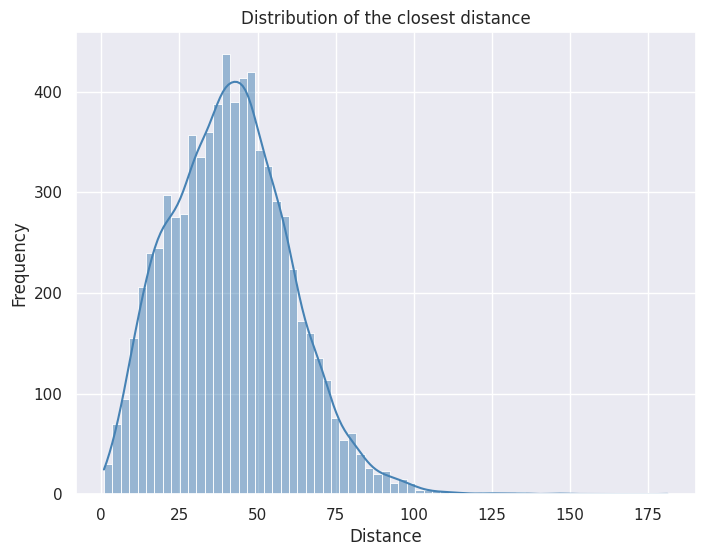

In [9]:
# (Optional) Calculate the closest distance between cells.
# If save=True, the result (closest_distance_distribution.pdf) is saved in the "neighbor_info" folder in the root directory.
closest_distances = CellNeighborEX.neighbors.calculate_closest_distance(df, save=True)

In [10]:
import pickle 
fout='save_closest_dist.p'
myfile=open(fout,'wb')
pickle.dump(closest_distances,myfile)
myfile.close()

In [11]:
# Find immediate neighbors using Delaunay triangulation and retrieve the spatial connectivity matrix.
matrix = CellNeighborEX.neighbors.detect_neighbors(adata, coord_key='spatial', type='generic', knn=None, radius_value=None, delaunay=True)

# Calculate the number of neighbors for each cell.
neiNum = CellNeighborEX.neighbors.get_neighbors(matrix)

In [12]:
# Processes the dataframe by adding additional columns based on the neighbor matrix and neighbor counts.
# If save=True, the result (df_processed.csv) is saved in the "neighbor_info" folder in the root directory.
df_processed = CellNeighborEX.neighbors.process_dataframe(df, matrix, neiNum, save=True)

/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/neighbors.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['celltype2'][i] = get_neighboring_cell_type(neiType=df['neiType'][i], celltype1=df['celltype1'][i])
/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/neighbors.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['celltype2'][i] = df['celltype1'][i]
/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/neighbors.py:240: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [13]:
df_processed.head(5) # celltype1 is the cell type of a centered cell, and celltype2 is its neighboring cell type. 
#first_type and second_type are numbers correspond to the cell types.

,barcode,first_type,second_type,celltype1,celltype2,x,y,prop1,prop2
0,cell2,5,12,Lymphatic,Stroma,2071.304348,87.072464,1.0,0.0
1,cell3,5,12,Lymphatic,Stroma,2091.342857,61.800000,1.0,0.0
2,cell4,12,5,Stroma,Lymphatic,2150.839744,40.916667,1.0,0.0
3,cell5,5,12,Lymphatic,Stroma,2238.180180,29.891892,1.0,0.0
4,cell6,5,12,Lymphatic,Stroma,2077.818182,220.454545,1.0,0.0


In [ ]:
###### before above I ran it ##############

In [14]:
# All categorzied files (index_, matchComb_, neiCombUnique_, prop_ .csv) are saved in the "categorized_data folder" in the root directory.
CellNeighborEX.categorization.generate_input_files(data_type = "Image", df = df_processed, sample_size=30, min_sample_size=1)



/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/categorization.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['integrated'][idx] = df['celltype1'][idx] + '+' + df['celltype2'][idx]
/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/categorization.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['index_boolean'][list_index1[yy]] = 1
/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/categorization.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


In [15]:
# Normalize gene expression data.
barcodes = df_processed['barcode'].tolist()
adata = adata[barcodes, :]
sc.pp.normalize_total(adata, target_sum=1e4) # normlization
sc.pp.log1p(adata) # log-transform

/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [16]:
# Save the data into dataframes.
df_cell_id = pd.DataFrame(adata.obs.index)
df_gene_name = pd.DataFrame(adata.var.index)
df_log_data = adata.T.to_df()
df_log_data = df_log_data.reset_index(drop=True) # row indices are represented as numbers.

In [17]:
df_log_data.head(5)

,cell2,cell3,cell4,cell5,cell6,cell7,cell8,cell9,cell11,cell12,...,cell8027,cell8075,cell8077,cell8081,cell8106,cell8121,cell8125,cell8153,cell8154,cell8198
0,0.000000,0.000000,0.000000,5.199492,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.726633,0.0
1,8.639973,8.853808,8.980892,9.106091,0.000000,8.688633,8.851850,8.999155,8.718027,8.738661,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,5.672825,5.658486,4.175964,0.000000,6.408628,4.708539,5.616672,0.000000,4.386580,5.217575,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [18]:
# The length of df_processed must be the same as the length of df_cell_id.
print(len(df_cell_id))
print(len(df_processed))

1971
1971


In [19]:
# Set argument values for CellNeighborEX.DEanalysis.analyze_data().
data_type = "Image"  # Image: image-based ST data, NGS: NGS-based ST data
lrCutoff = 0.4 # log ratio
pCutoff = 0.01 # p-value
pCutoff2 = 0.05 # false discovery rate
direction = 'up' # up: up-reguated genes, down: down-regulated genes
normality_test = False # True: depending on the result of the normality test, the statistical test is determined. If the data is normal, the parametric test is used. Otherwise, the non-parametric test is used.
                       # False: when sample size (number of cells/spots) is larger than 30, the parameteric test is used. Otherwise, the non-parametric test is used.
top_genes = 10 # Top 10 DEGs are annotated in the volcano plot.

In [20]:
path_categorization= './categorized_data/'

neighbor-dependent gene expression analysis:   0%|       | 0/10 [00:00<?, ?it/s]/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


0


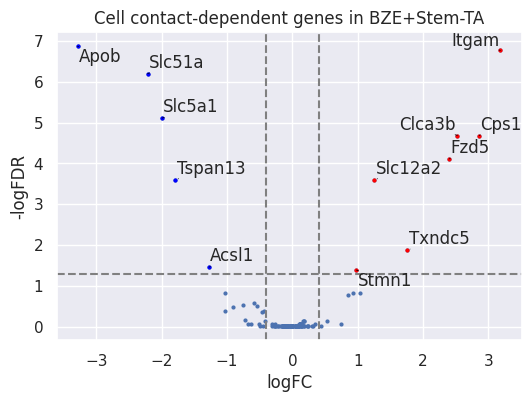

/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:660: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(a, fontsize=12)  # Sets the y-axis tick labels with fontsize 12


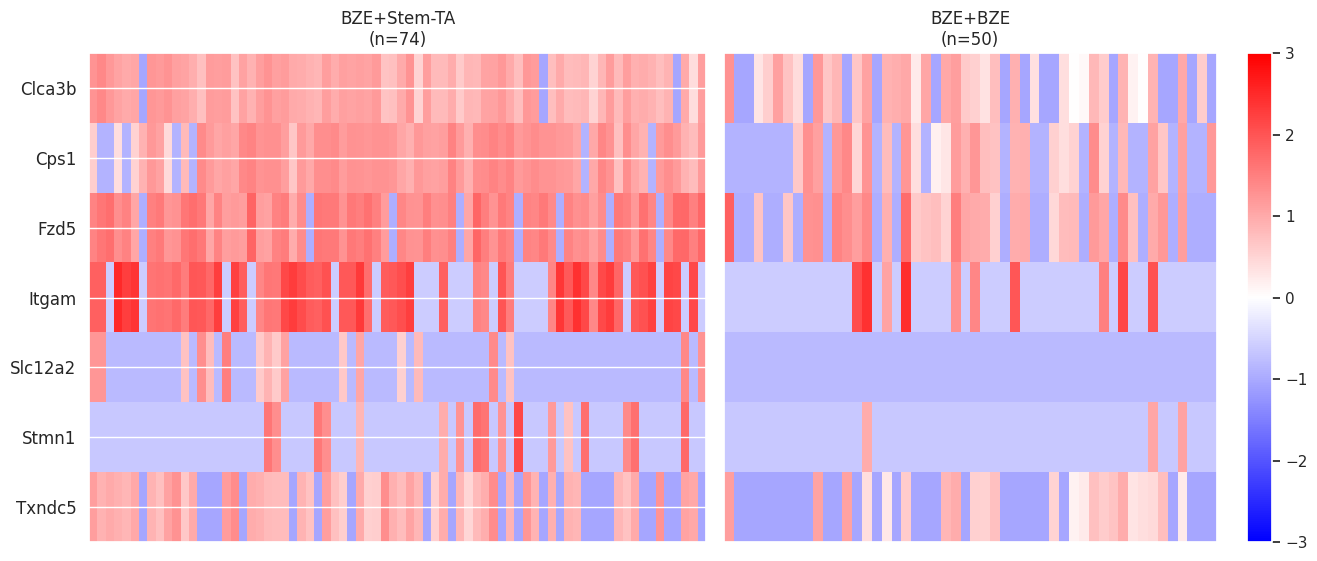

neighbor-dependent gene expression analysis:  10%| | 1/10 [00:01<00:15,  1.70s/i/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


1


neighbor-dependent gene expression analysis:  20%|▏| 2/10 [00:01<00:06,  1.19it//home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


2


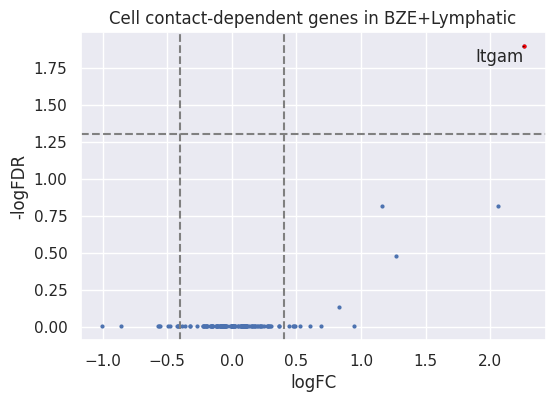

/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:660: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(a, fontsize=12)  # Sets the y-axis tick labels with fontsize 12


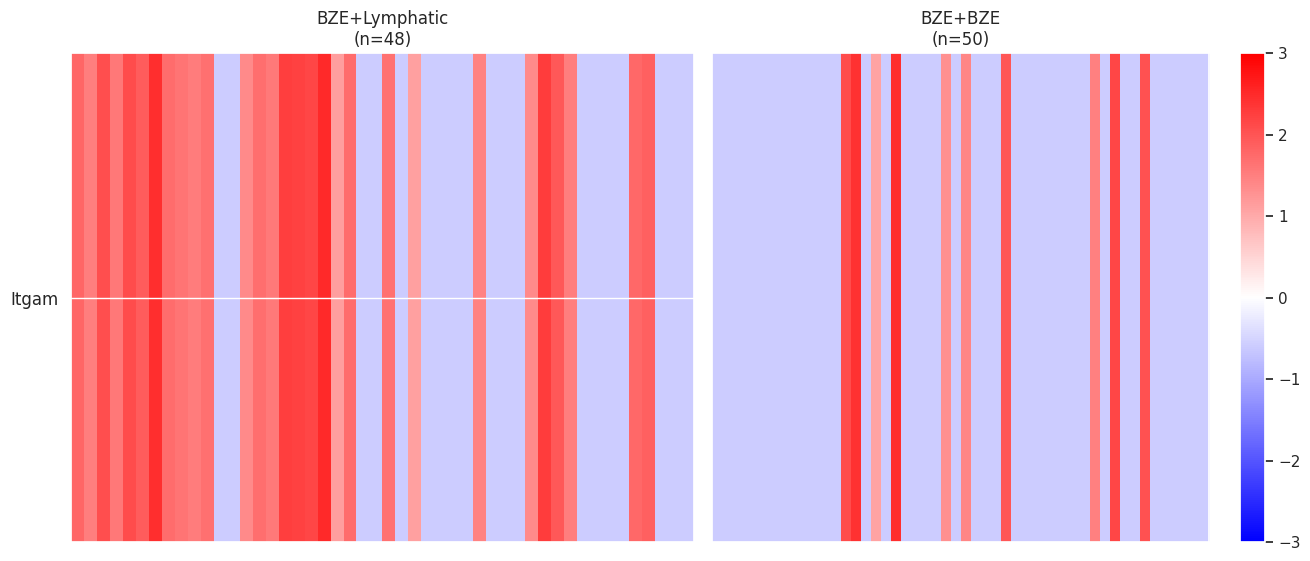

neighbor-dependent gene expression analysis:  30%|▎| 3/10 [00:02<00:06,  1.08it//home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


3


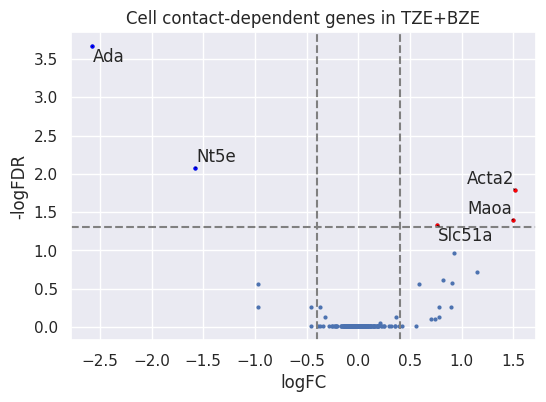

/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:660: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(a, fontsize=12)  # Sets the y-axis tick labels with fontsize 12


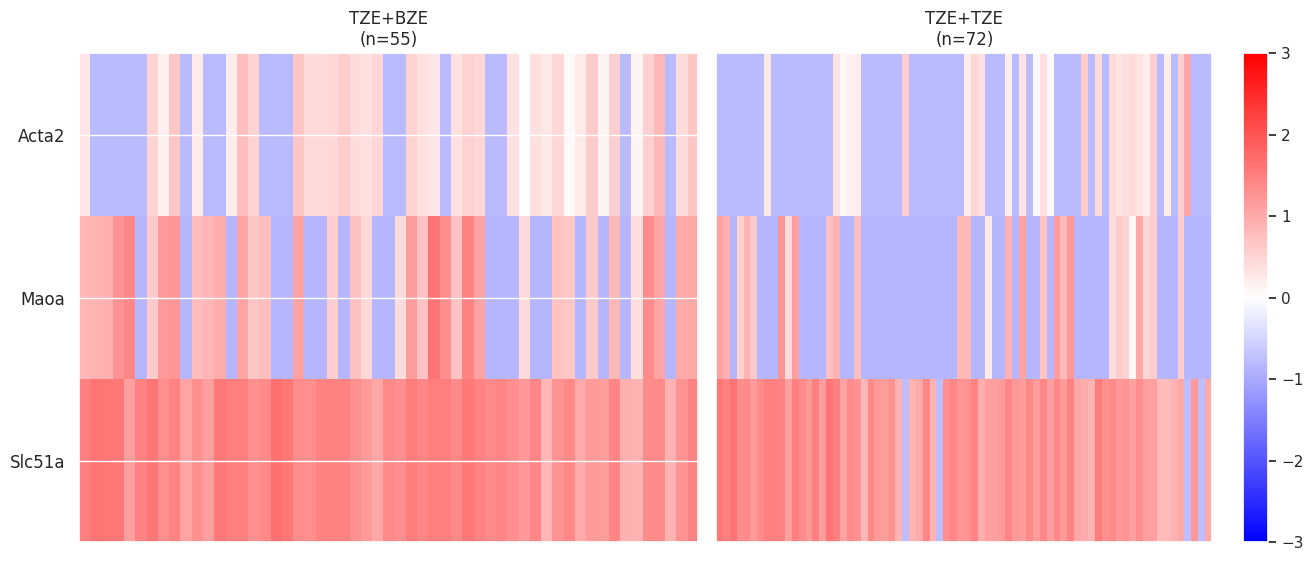

neighbor-dependent gene expression analysis:  40%|▍| 4/10 [00:04<00:06,  1.05s/i/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]
/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


4
5


neighbor-dependent gene expression analysis:  60%|▌| 6/10 [00:04<00:02,  1.76it//home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


6


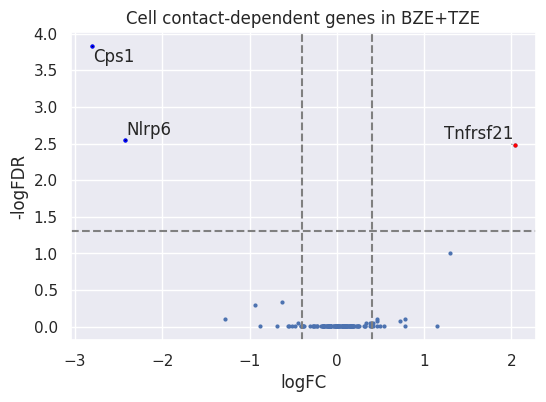

/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:660: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(a, fontsize=12)  # Sets the y-axis tick labels with fontsize 12


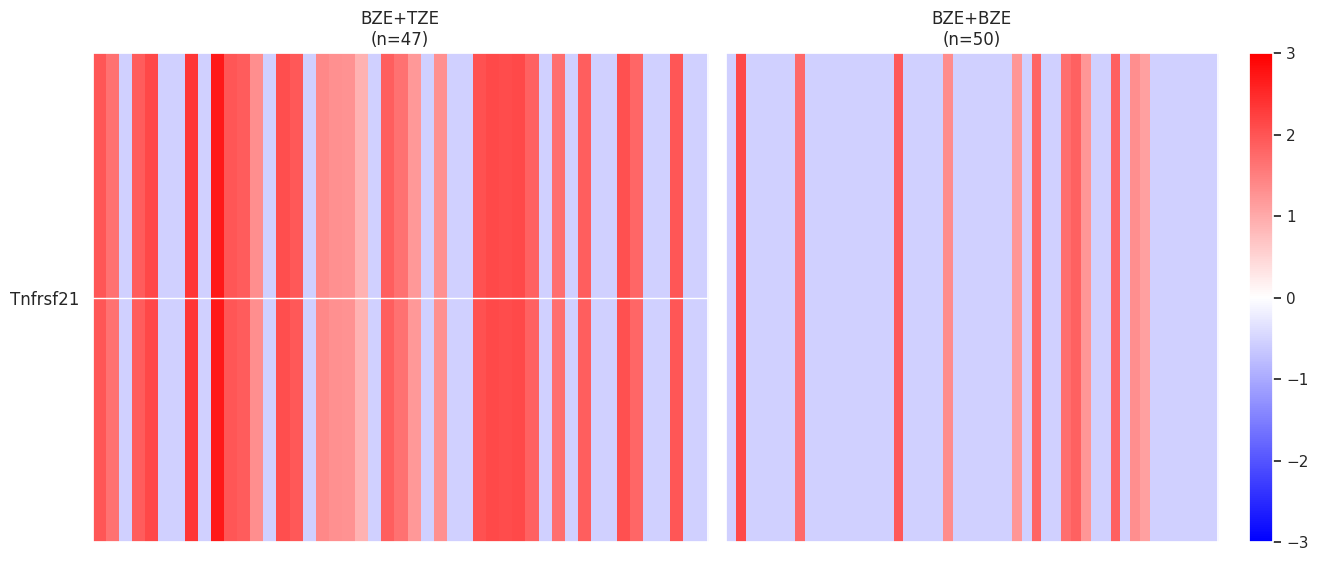

neighbor-dependent gene expression analysis:  70%|▋| 7/10 [00:05<00:02,  1.41it//home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


7


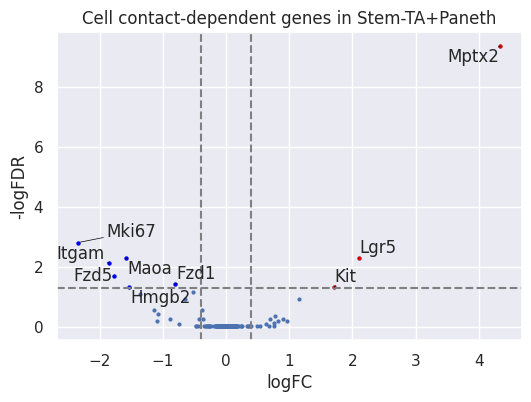

/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:660: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(a, fontsize=12)  # Sets the y-axis tick labels with fontsize 12


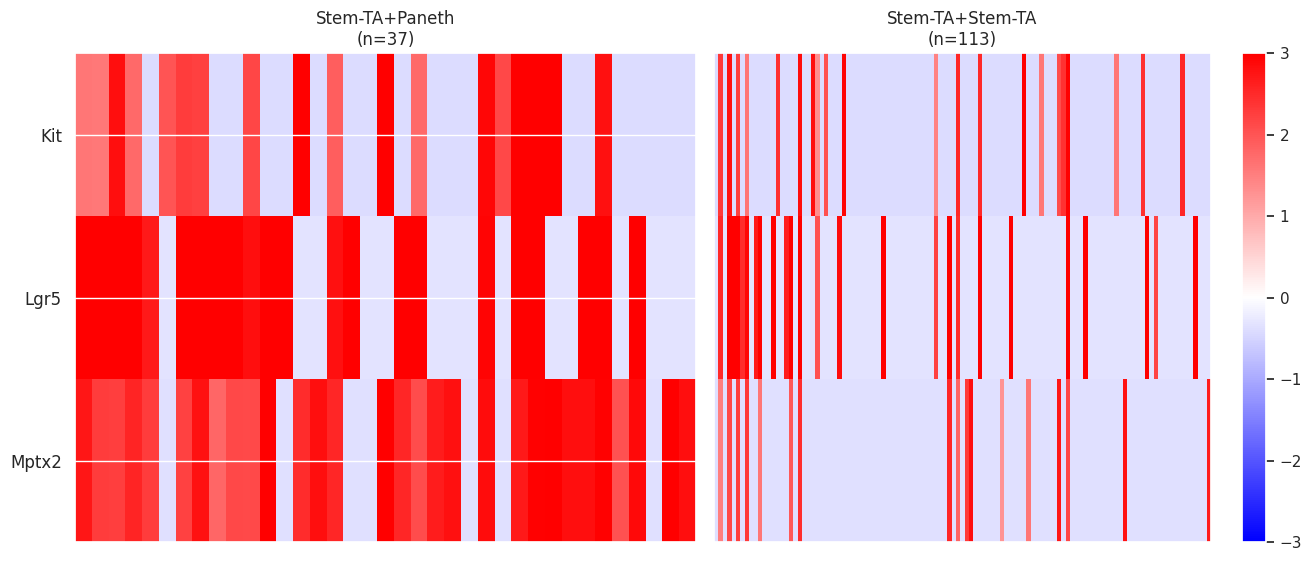

neighbor-dependent gene expression analysis:  80%|▊| 8/10 [00:06<00:01,  1.14it//home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


8


neighbor-dependent gene expression analysis:  90%|▉| 9/10 [00:07<00:00,  1.45it//home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:1131: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  log_data_zvalue = (log_data_total - mean_values[:, np.newaxis]) / std_values[:, np.newaxis]


9


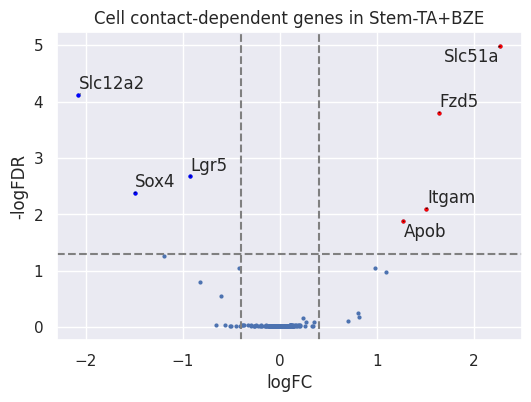

/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/DEanalysis.py:660: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(a, fontsize=12)  # Sets the y-axis tick labels with fontsize 12


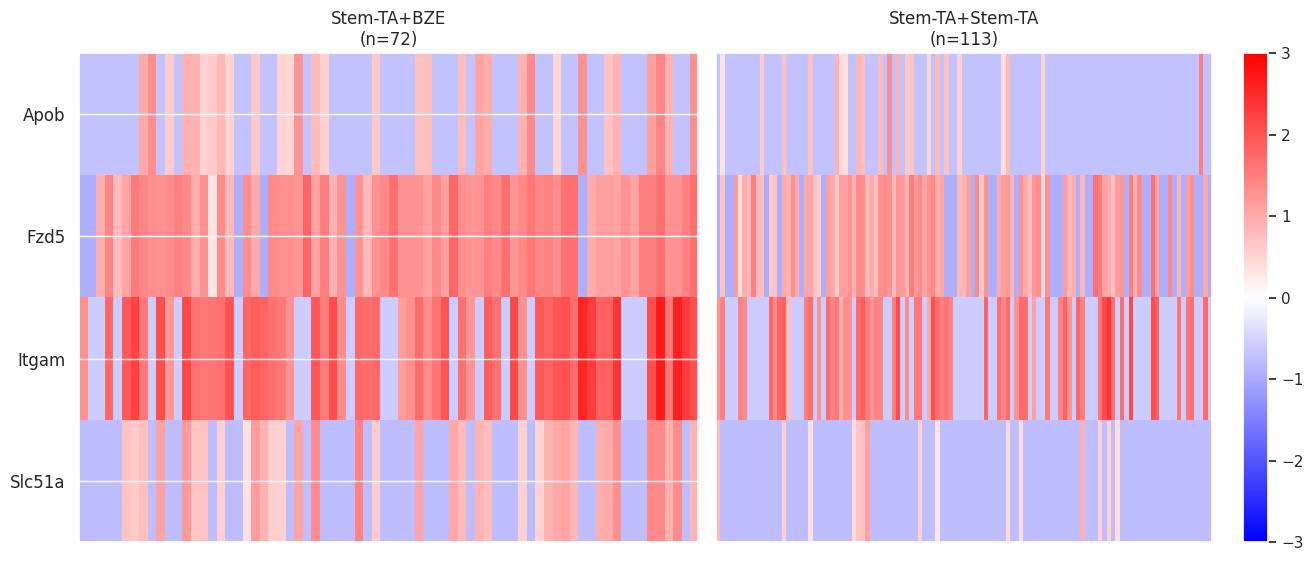

neighbor-dependent gene expression analysis: 100%|█| 10/10 [00:08<00:00,  1.20it


In [21]:
# If save=True, all result files (DEG list: csv, heatmaps and volcano plots: pdf, gene expression values: txt) are saved in the "DE_results" folder in the root directory.
DEG_list = CellNeighborEX.DEanalysis.analyze_data(df_cell_id, df_gene_name, df_log_data, 
                                                  path_categorization, data_type, lrCutoff, 
                                                  pCutoff, pCutoff2, direction, normality_test, top_genes, save=True)

In [22]:
# Select a cell type and a DEG for spatial visualization and then load the data.
# For example, Pitx1 is up-regulated when Gut-tube are adjacent to Neural-crest.
path_selected = './DE_results/Stem-TA+Paneth/'
column_names = ['barcode', 'logdata', 'zscore']
heterotypic = pd.read_csv(path_selected + "Stem-TA+Paneth_Kit.txt", delimiter=",", names = column_names)
homotypic1 = pd.read_csv(path_selected + "Paneth+Paneth_Kit.txt", delimiter=",", names = column_names)
homotypic2 = pd.read_csv(path_selected + "Stem-TA+Stem-TA_Kit.txt", delimiter=",", names = column_names)
heterotypic['type'] = 'Stem-TA+Paneth_Kit'
homotypic1['type'] = 'Paneth+Paneth_Kit'
homotypic2['type'] = 'Stem-TA+Stem-TA_Kit'
df_exp = pd.concat([heterotypic, homotypic1, homotypic2])

In [23]:
df_bg, df_red, df_blue, df_black = CellNeighborEX.visualization.set_parameters(df_processed, df_exp, beadsize_bg=5, edgecolor_bg=(0.85,0.85,0.85),
                beadcolor_bg=(0.85,0.85,0.85),
                beadsize_red=60, beadsize_blue=30, beadsize_black=30, 
             type_red='Stem-TA+Paneth_Kit', type_blue='Paneth+Paneth_Kit', 
             type_black='Stem-TA+Stem-TA_Kit')

/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/visualization.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed['edgecolor'][idx] = edgecolor_bg
/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/visualization.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed['beadcolor'][idx] = edgecolor_bg
/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/visualization.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the do

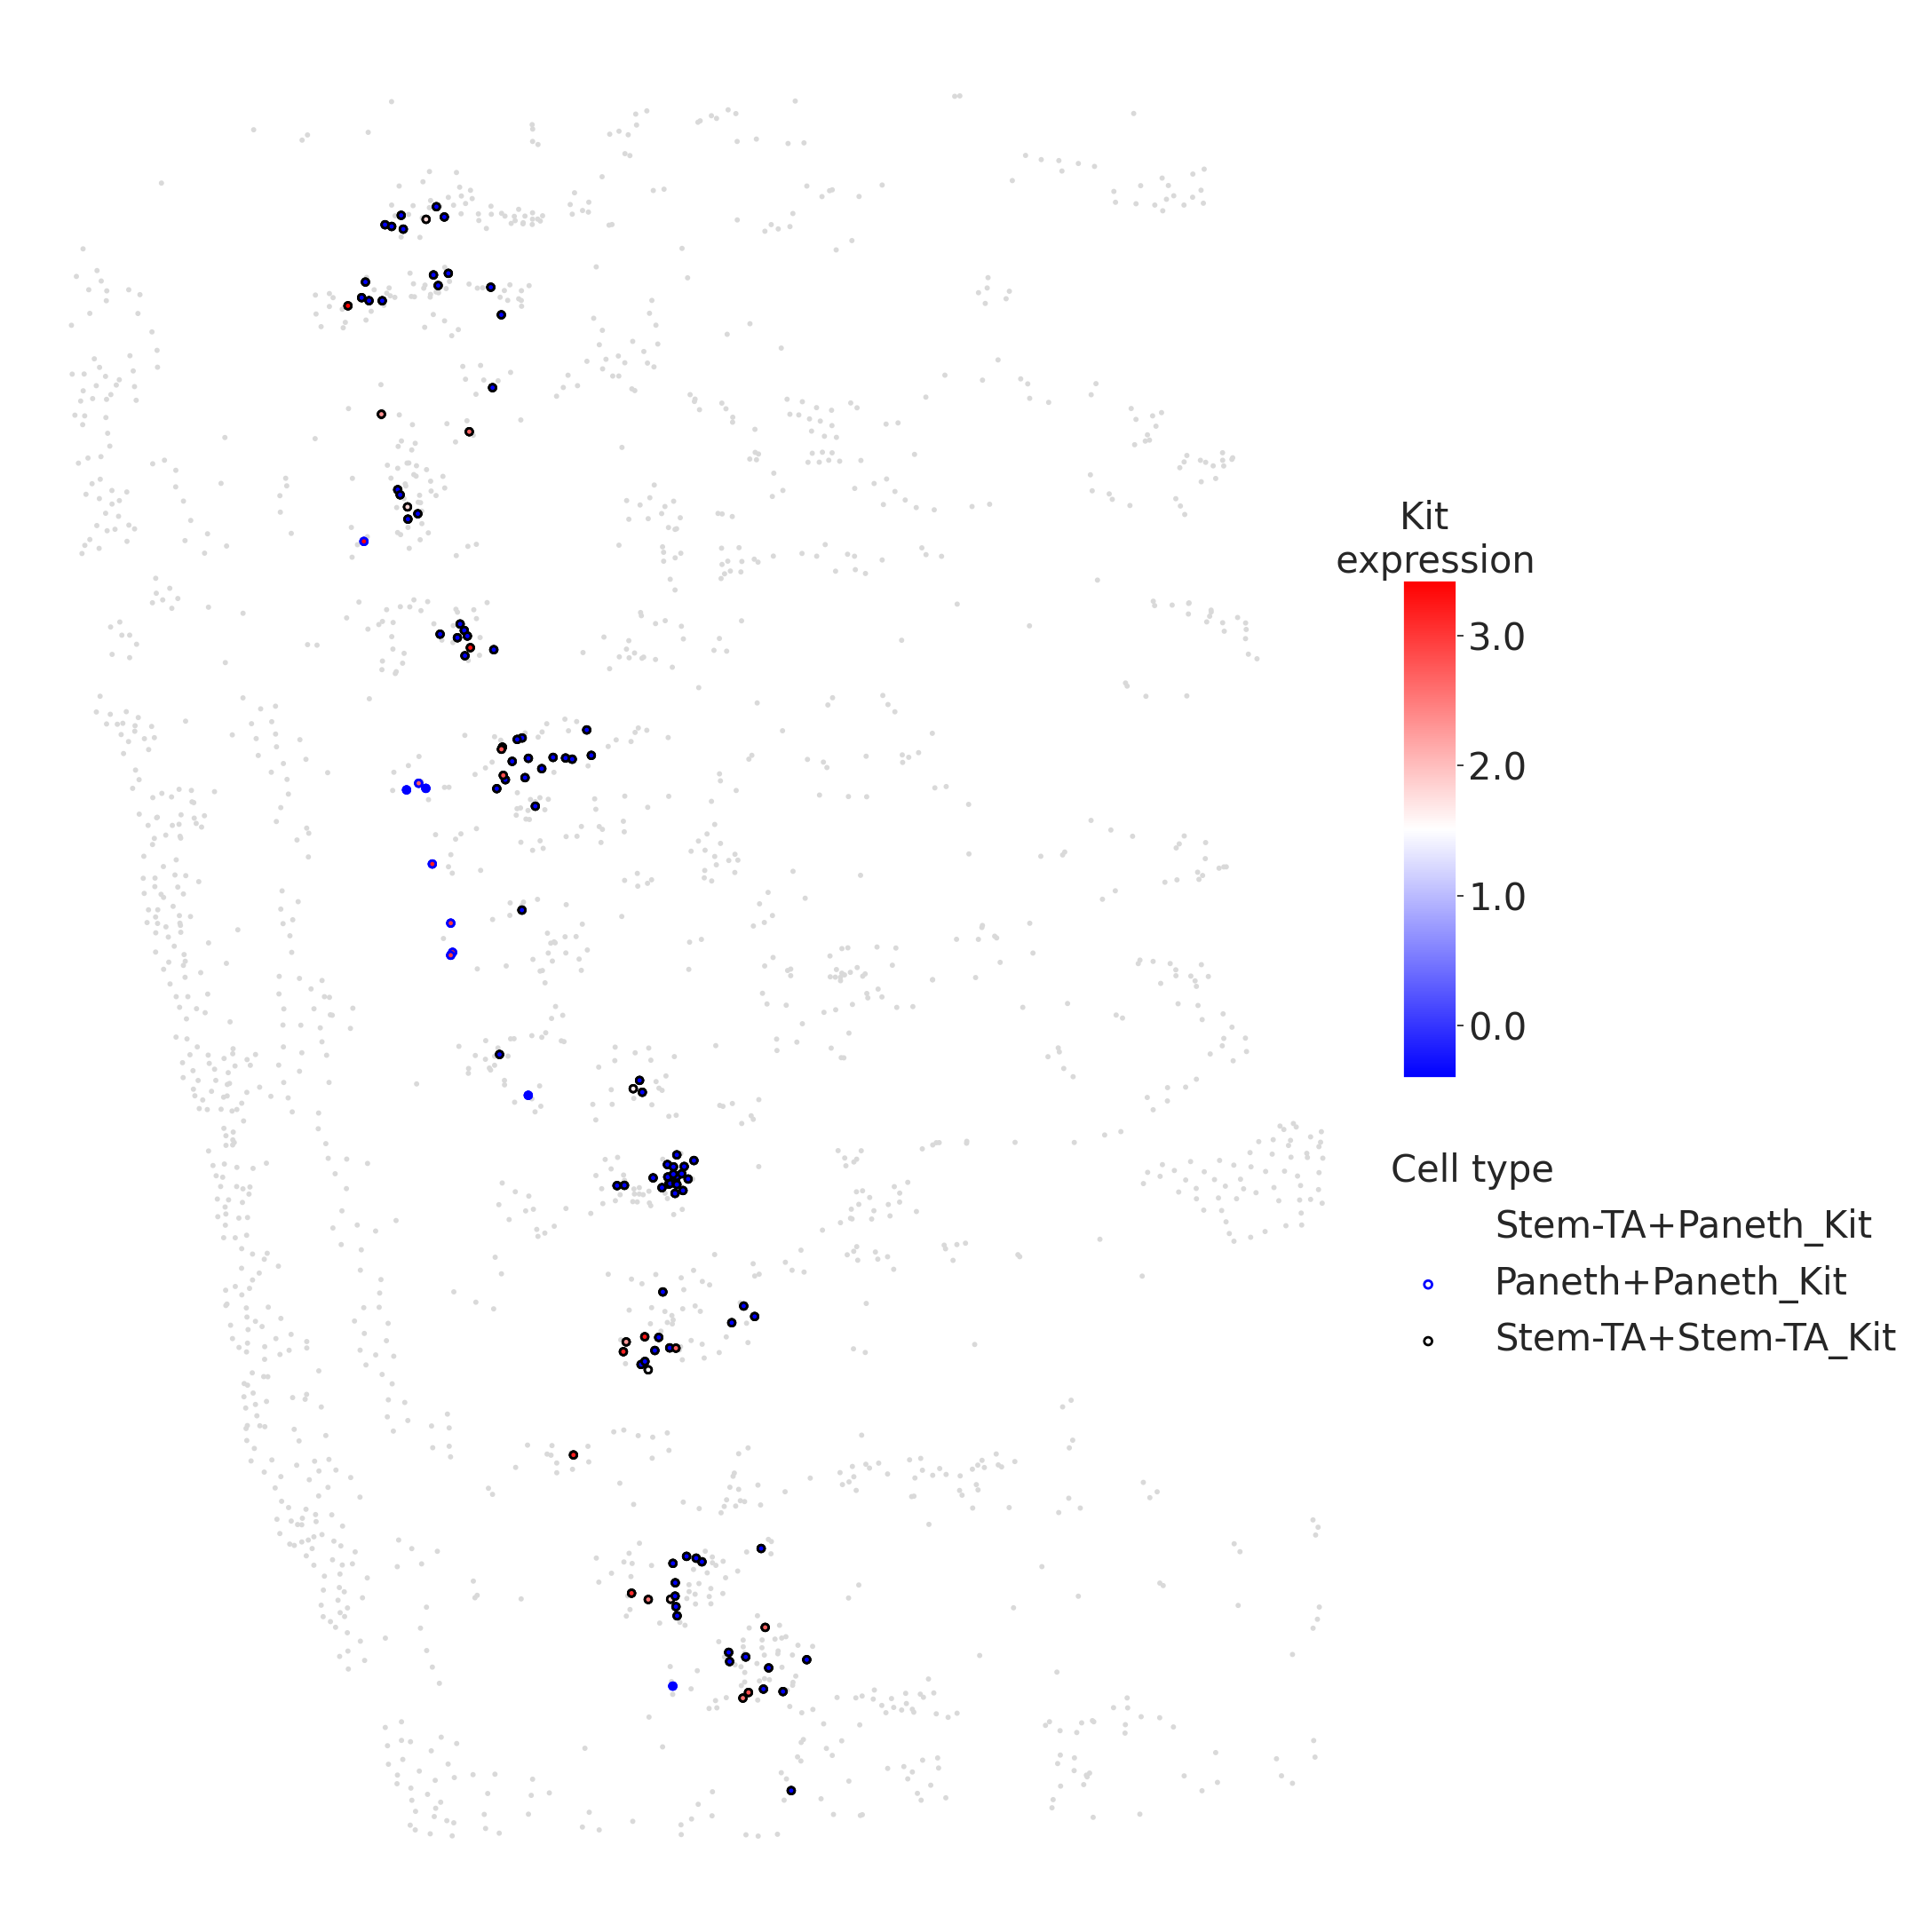

In [24]:
# Get the spatial map.
# zorder_red, zorder_blue, and zorder_black are parameters that determine the drawing order in the spatial map.
# If save=True, the spatial map (Pitx1.pdf) is saved in the "spatialMap" folder in the root directory.
CellNeighborEX.visualization.get_spatialPlot(df_bg, df_red, df_blue, df_black, 
        label_red='Stem-TA+Paneth_Kit', label_blue='Paneth+Paneth_Kit', label_black='Stem-TA+Stem-TA_Kit',
        label_gene='Kit', zorder_red=3.0, zorder_blue=2.0, zorder_black=4.0, figsize=(20,28), save=True)


/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/visualization.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed['edgecolor'][idx] = edgecolor_bg
/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/visualization.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed['beadcolor'][idx] = edgecolor_bg
/home/sclab/miniconda3/envs/cellneighborex/lib/python3.10/site-packages/CellNeighborEX/visualization.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the do

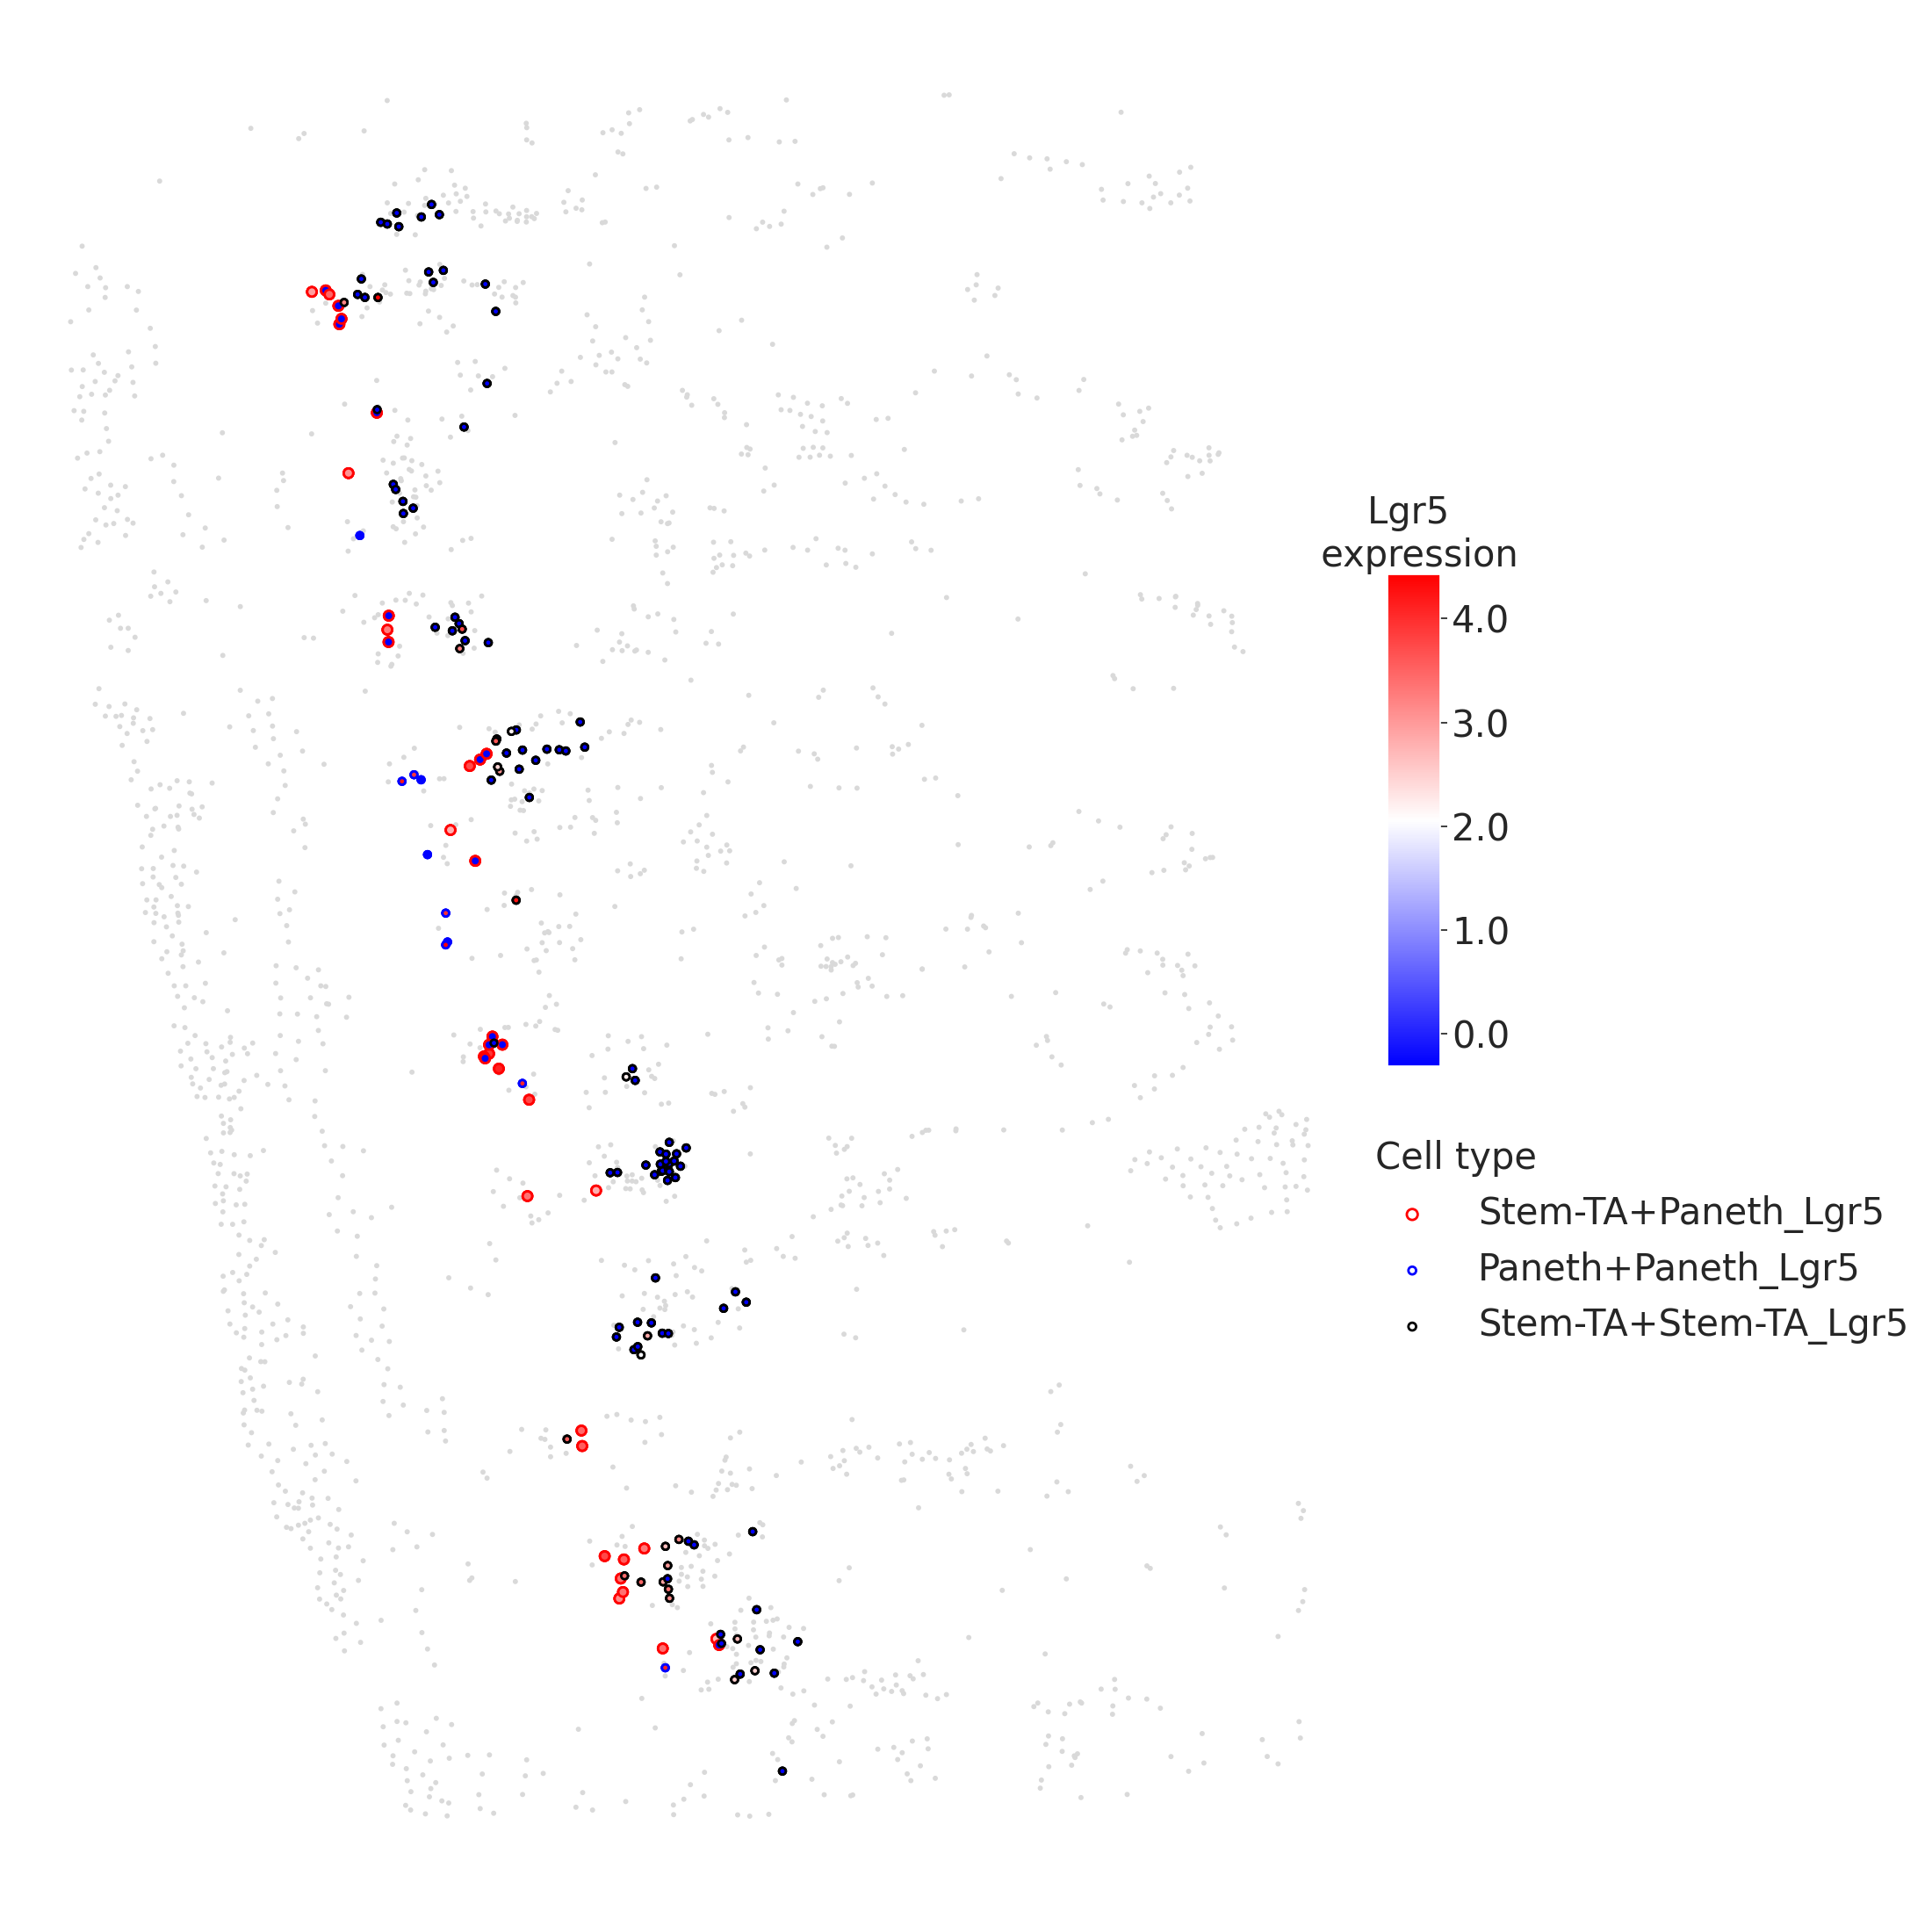

In [26]:
name1='Stem-TA+Paneth_Lgr5'
name2='Paneth+Paneth_Lgr5'
name3='Stem-TA+Stem-TA_Lgr5'
gname='Lgr5'
path_selected = './DE_results/Stem-TA+Paneth/'



column_names = ['barcode', 'logdata', 'zscore']
heterotypic = pd.read_csv(path_selected + name1+".txt", delimiter=",", names = column_names)
homotypic1 = pd.read_csv(path_selected + name2+".txt", delimiter=",", names = column_names)
homotypic2 = pd.read_csv(path_selected + name3+".txt", delimiter=",", names = column_names)
heterotypic['type'] = name1
homotypic1['type'] = name2
homotypic2['type'] =name3
df_exp = pd.concat([heterotypic, homotypic1, homotypic2])



df_bg, df_red, df_blue, df_black = CellNeighborEX.visualization.set_parameters(df_processed, df_exp, beadsize_bg=5, edgecolor_bg=(0.85,0.85,0.85),
beadcolor_bg=(0.85,0.85,0.85),
beadsize_red=60, beadsize_blue=30, beadsize_black=30, 
 type_red=name1, type_blue=name2, 
 type_black=name3)


CellNeighborEX.visualization.get_spatialPlot(df_bg, df_red, df_blue, df_black, 
label_red=name1, label_blue=name2, label_black=name3,
label_gene=gname, zorder_red=3.0, zorder_blue=2.0, zorder_black=4.0, figsize=(20,28), save=True)